# Homework III: Quantifying Uncertainty and Probabilistic Reasoning

In [1]:
from pomegranate import *
import numpy as np

### Part 1
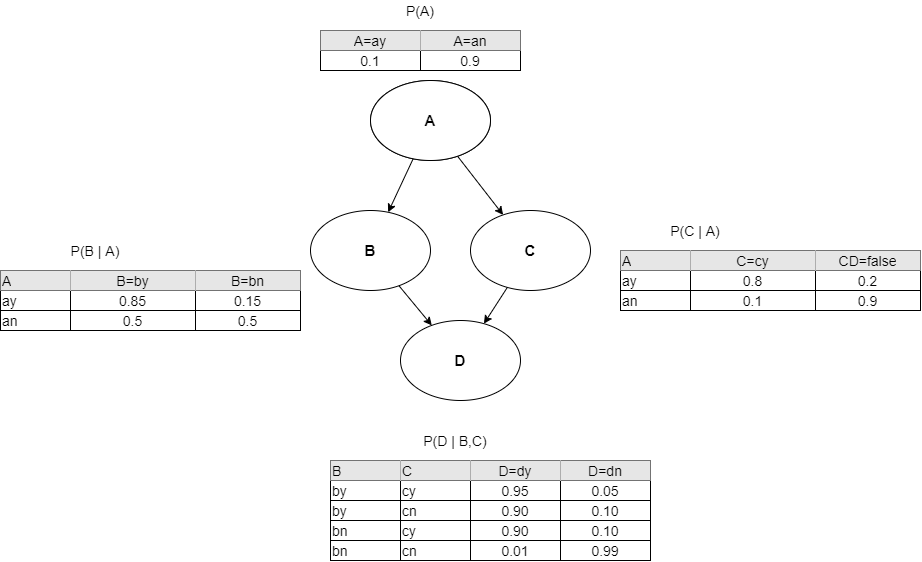 
1)	Above you see a Bayesian network (20 points)

- Implement this Bayesian network in pomegranate.
- Calculate P(ay| bn, dn) in pomegranate. 


In [2]:
## Build your BN model here. You can add additional code and markdown boxes when necessary.

pa = DiscreteDistribution({'an': 0.9, 'ay': 0.1})
ancestor = Node(pa, name="A")


In [3]:
bad = ConditionalProbabilityTable([
    ['ay','by', 0.85],              
    ['ay', 'bn', 0.15],
    ['an','by', 0.5],
    ['an','bn',0.5]
    ], [ancestor.distribution])

pba = Node(bad, name="B")

In [4]:
cad = ConditionalProbabilityTable([
    ['ay','cy', 0.8],              
    ['ay', 'cn', 0.2],
    ['an','cy', 0.1],
    ['an', 'cn', 0.9]
    ], [ancestor.distribution])

pca = Node(cad, name="C")

In [5]:
dbc = Node(ConditionalProbabilityTable([
    ['by', 'cy', 'dy', 0.95],
    ['by', 'cy', 'dn', 0.05],
    ['by', 'cn', 'dy', 0.90],
    ['by', 'cn', 'dn', 0.10],
    ['bn', 'cy', 'dy', 0.90],
    ['bn', 'cy', 'dn', 0.10],
    ['bn', 'cn', 'dy', 0.01],
    ['bn', 'cn', 'dn', 0.99],
], [pba.distribution, pca.distribution]), name="D")

In [6]:
model = BayesianNetwork()

model.add_nodes(ancestor, pba, pca, dbc)

model.add_edge(ancestor, pba)
model.add_edge(ancestor, pca)
model.add_edge(pba, dbc)
model.add_edge(pca, dbc)

In [7]:
model.bake()

In [8]:
pred = model.predict_proba({
    'B':'bn',
    'D':'dn'
})
print(pred)

[{
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "an" : 0.9898198330159659,
            "ay" : 0.010180166984034109
        }
    ],
    "frozen" : false
}
 'bn'
 {
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "cy" : 0.013915336165226388,
            "cn" : 0.9860846638347737
        }
    ],
    "frozen" : false
}
 'dn']


#### As we can see given bn and dn, probability of ay "P(ay| bn, dn)" is:  0,0102

In [9]:
def print_predictions(model, predictions):
    for node, prediction in zip(model.states, predictions):
        if isinstance(prediction, str):
            print(f"{node.name}: {prediction}")
        else:
            print(f"{node.name}")
            for value, probability in prediction.parameters[0].items():
                print(f"    {value}: {probability:.4f}")
                
print_predictions(model,pred)

A
    an: 0.9898
    ay: 0.0102
B: bn
C
    cy: 0.0139
    cn: 0.9861
D: dn


2)	Write a program that calculates for P(ay| bn, dy) by using the ‘Rejection Sampling’ technique. Your program does not have to be general, it is ok if it is only designed for calculating P(ay| bn, dy). Your program does not need to use pomegranate. Your program should take a number S as input. It should not stop until it accepts S samples. It should print out the probability P(ay| bn, dy) and the percentage of accepted samples (20 points)

You can get one random sample from a distribution in numpy as follows. You may use this [`random.choice`](https://docs.scipy.org/doc//numpy-1.10.4/reference/generated/numpy.random.choice.html) function to generate samples for your rejection sampling algorithm.


In [12]:
np.random.choice(["ay","an"], 1, p=[0.1,0.9])

array(['ay'], dtype='<U2')

In [24]:
# below three variables are set as global variables in order to use them easily for calcutations.
                        ######################################
accepted_samples = []  # :are samples which have "ay" and "an" given bn and dy
N = []                # :are samples which have "ay" given bn, dy 
samples = []         # :are all created samples
                    #######################################
    
def rejection_sampling(S):
    
    # generating samples
    for u in range(S):      
        u = []
        za = np.random.choice(["ay","an"], 1, p=[0.1,0.9])
        if za=="ay":
            zb = np.random.choice(["by","bn"], 1, p=[0.85,0.15])
            zc = np.random.choice(["cy","cn"], 1, p=[0.8,0.2])
            if zb=="bn" and zc=="cy":
                zd = np.random.choice(["dy","dn"], 1, p=[0.90,0.10])
            elif zb=="bn" and zc=="cn":
                zd = np.random.choice(["dy","dn"], 1, p=[0.01,0.99])
            elif zb=="by" and zc=="cy":
                zd = np.random.choice(["dy","dn"], 1, p=[0.95,0.05])
            elif zb=="by" and zc=="cn":
                zd = np.random.choice(["dy","dn"], 1, p=[0.90,0.10])
        else:
            zb = np.random.choice(["by","bn"], 1, p=[0.5,0.5])
            zc = np.random.choice(["cy","cn"], 1, p=[0.1,0.9])
            if zb=="bn" and zc=="cy":
                zd = np.random.choice(["dy","dn"], 1, p=[0.90,0.10])
            elif zb=="bn" and zc=="cn":
                zd = np.random.choice(["dy","dn"], 1, p=[0.01,0.99])
            elif zb=="by" and zc=="cy":
                zd = np.random.choice(["dy","dn"], 1, p=[0.95,0.05])
            elif zb=="by" and zc=="cn":
                zd = np.random.choice(["dy","dn"], 1, p=[0.90,0.10]) 
            
        u.extend([za, zb, zc, zd])
        
        samples.append(u)
  
    # check the sample's consistency with evidence
    for sample in samples:
        if sample.count('bn') == 1 and sample.count('dy') == 1:
            accepted_samples.append(sample)            
            if sample.count('ay') == 1 and sample.count('bn') == 1 and sample.count('dy') == 1:
                N.append(sample)


In [25]:
rejection_sampling(500)

### To check if the code generates 500 sample:

In [26]:
print(len(samples))
print(len(accepted_samples))
print(len(N))

500
37
7


### To check if samples, accepted_samples and N list have duplicates:

In [27]:
def anydup(liste):
    seen = []
    for sample in liste:
        if sample in seen: 
            return True
        seen.append(sample)
    return False

anydup(N)
anydup(accepted_samples)
anydup(samples)

True

### So, we need to get rid of the duplicates:

In [28]:
def remove_dup(liste):
    new = []
    for sample in liste:
        if sample not in new:
            new.append(sample)
    return new

new_samples = remove_dup(samples)
new_accepted_samples = remove_dup(accepted_samples)
new_N = remove_dup(N)

In [29]:
print(len(new_samples))
print(len(new_accepted_samples))
print(len(new_N))

13
3
1


In [30]:
res_prob = len(new_N)/len(new_accepted_samples)
print(f"The probability P(ay| bn, dy) with rejection sampling is: {res_prob}.")

ratio = len(new_accepted_samples) / len(new_samples)
res_percentage = ratio * 100
print(f"The percentage of accepted samples is: {res_percentage}.")

The probability P(ay| bn, dy) with rejection sampling is: 0.3333333333333333.
The percentage of accepted samples is: 23.076923076923077.


3)	BONUS: Write a program that calculates P(ay| bn, dy) with likelihood sampling for the model above.  (30 points)

In [54]:
def importance_sampling(P):
    
    samples2 = [] # :are all created samples

    # generating samples
    for u in range(P):
        u = []
        za = np.random.choice(["ay","an"], 1, p=[0.1,0.9])
        if za=="ay":
            zb = np.random.choice(["by","bn"], 1, p=[0,1])
            zc = np.random.choice(["cy","cn"], 1, p=[0.8,0.2])
            zd = np.random.choice(["dy","dn"], 1, p=[1,0])
        else:
            zb = np.random.choice(["by","bn"], 1, p=[0,1])
            zc = np.random.choice(["cy","cn"], 1, p=[0.1,0.9])
            zd = np.random.choice(["dy","dn"], 1, p=[1,0]) 
            
        u.extend([za, zb, zc, zd])
        
        samples2.append(u)
         
    ####### removing duplicates by using for loop #######
    u_samples = []
    for sample in samples2:
        if sample not in u_samples:
            u_samples.append(sample)
            
    print(f"The number of unique samples we have is: {len(u_samples)}") # to see how many unique samples we have
        
    # calculating weight of all samples(samples given bn, dy) by multiplying probabilities
        
    all_weights = 0
    
    for sample in u_samples:

        w = 1
        
        if sample.count('ay') == 1 and sample.count('cy') == 1:                    
            weight = w * 0.8 * 0.9
        elif sample.count('ay') == 1 and sample.count('cn') == 1:
            weight = w * 0.2 * 0.01           
        elif sample.count('an') == 1 and sample.count('cn') == 1:
            weight = w * 0.9 * 0.01
        elif sample.count('an') == 1 and sample.count('cy') == 1:
            weight = w * 0.1 * 0.9
            
        all_weights = all_weights + weight

    # calculating weight of samples(samples with ay given bn, dy) by multiplying probabilities
    
    weights_with_ay = 0
    
    for sample in u_samples:
        
        w = 1
        
        if sample.count('ay') == 1 and sample.count('cy') == 1:                    
            weight = w * 0.8 * 0.9
        elif sample.count('ay') == 1 and sample.count('cn') == 1:
            weight = w * 0.2 * 0.01
            
        weights_with_ay = weights_with_ay + weight

    X = weights_with_ay / all_weights
        
    print(f"The probability of P(ay| bn, dy) with likelihood sampling is: {X}")
        
importance_sampling(500)

The number of unique samples we have is: 4
The probability of P(ay| bn, dy) with likelihood sampling is: 0.8842874543239951


4) Choose a problem that requires reasoning under uncertainty, and build a BN for this problem, implement this BN in **pomegranate**. 
- Describe the background and aim of the BN model. Define what will be the model used for? What is/are the target variables that are predicted, inferred in the BN. 
- Describe what each node (variable) in the BN represents. Write the values that each variable can take. 
- Draw the BN structure (you can use [draw.io](https://app.diagrams.net/), powerpoint or some other software for this). Note that BN structure should reflect causal relations as much as possible. 
- Define the conditional probability tables (CPTs) based on your knowledge or intuition. 
- Create three scenarios for your model. A scenario is a set of input values (evidence values) run on the model. Describe each scenario, and comment about its prediction for the target variables (whether they are reasonable probabilities)
- Write 5 conditional independencies based on your model structure (see d-separation). Try to write less obvious ones for getting full grade. 
- Your BN model should be **original** (it should not be one from literature, or the same as your classmates’ models). It should be related to your area of study. Suitable domains for BN models include reasoning for a latent cause (e.g. diagnosing a sickness from observations, diagnosing the cause of a failure or breakdown, inferring a mental state from observations, etc.)
- The model should contain at least **6 nodes**

Write both the report about your model and the code in this notebook. Add additional markdown and code boxes when necessary.

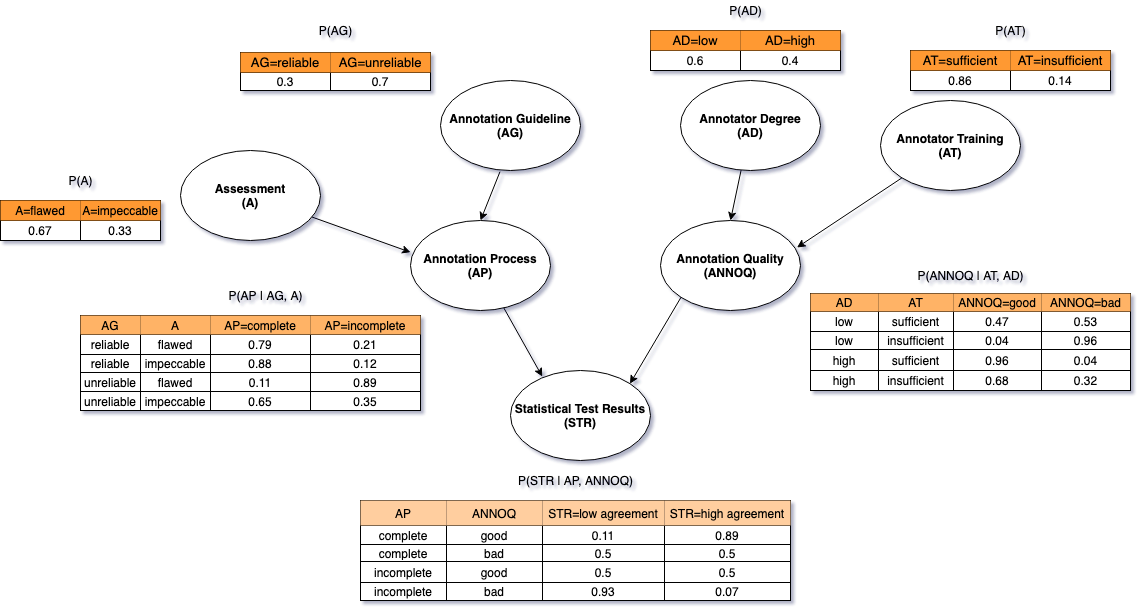

### Aim of the BN model

The aim of the model is to calculate the success/failure probability of the dialogue annotation task. Depending on values of variables AG, AD, AT as parents and AP, ANNOQ as child nodes, we can predict which variable(cause) influences the success of the result(STR, success=high agreement,failure=low agreement) in what way and/or at what rate.

In Natural Language Processing, annotation is the study of written or spoken texts, dialogues etc. It identifies the text regarding the obtained information. For example, if our study is about explicit connectives, e.g. *and, or, because* etc., we should mark these connectives and the arguments that they are attached. For BN modelling, I chose a problem that concerns with success of the study depending on the rate of the statistical test results.


### Parent Nodes

Annotation Guideline(AG): Every annotation task has a guideline includes instructions for how annotators should annotate the data. It makes the rules for annotation task. It can be reliable or unreliable depending on how well it is prepared.

Assessment(A): Represents the assessment of annotation process. It is a program that calculates completeness of process by percentage, and evaluates whether the annotation is complete or not. The program have the probability distribution for being a flawed program or an impeccable one that works well. It is a made up thing in order to make more complicated model structure, I do not know whether there can be this kind of machine related process in annotation task. Nevertheless, it makes sense as a theoretical thinking.

Annotator Degree(AD): Annotators are categorized regarding their qualifications. Annotators can have high degree as an expert, usually the author of guidelines or low degree annotators who are just at the beginning in the annotation task.

Annotator Training(AT): Even the annotator degree can be high, training of an annotator may be inadequate. It is important to know that how much they have trained or how intensive, what information they have apart from the guidelines.

### Child Nodes

Annotation Process(AP): Depending on the prepared guideline, when unreliable, annotation process can be incompleted which causes getting low results from statistical tests.

Annotation Quality(ANNOQ): Quality of an annotation is related to the annotators' degree and training. It is how well annotated the text(good annotation vs. bad annotation), and directly influences the statistical test results.

Statistical Test Results(STR): Statistical tests are success/failure measurements of the annotation study. If it gives high agreement, then our study will be assessed as a successful study.

In [34]:
ag = DiscreteDistribution({'reliable': 0.3, 'unreliable': 0.7})
parent1 = Node(ag, name="AG")

ad = DiscreteDistribution({'low': 0.6, 'high': 0.4})
parent2 = Node(ad, name="AD")

at = DiscreteDistribution({'sufficient': 0.86, 'insufficient': 0.14})
parent3 = Node(at, name="AT")

a = DiscreteDistribution({'flawed': 0.67, 'impeccable': 0.33})
parent4 = Node(a, name="A")

In [35]:
ap = ConditionalProbabilityTable([
    ['reliable', 'flawed', 'complete', 0.79],
    ['reliable', 'flawed', 'incomplete', 0.21],
    ['reliable', 'impeccable', 'complete', 0.88],
    ['reliable', 'impeccable', 'incomplete', 0.12],
    ['unreliable', 'flawed', 'complete', 0.11],
    ['unreliable', 'flawed', 'incomplete', 0.89],
    ['unreliable', 'impeccable', 'complete', 0.65],
    ['unreliable', 'impeccable', 'incomplete', 0.35],
], [parent1.distribution, parent4.distribution])

apag = Node(ap, name="AP")

In [36]:
annoq = Node(ConditionalProbabilityTable([
    ['low', 'sufficient', 'good', 0.47],
    ['low', 'sufficient', 'bad', 0.53],
    ['low', 'insufficient', 'good', 0.04],
    ['low', 'insufficient', 'bad', 0.96],
    ['high', 'sufficient', 'good', 0.96],
    ['high', 'sufficient', 'bad', 0.04],
    ['high', 'insufficient', 'good', 0.68],
    ['high', 'insufficient', 'bad', 0.32],
], [parent2.distribution, parent3.distribution]), name="ANNOQ")

In [37]:
strd = Node(ConditionalProbabilityTable([
    ['complete', 'good', 'low agreement', 0.11],
    ['complete', 'good', 'high agreement', 0.89],
    ['complete', 'bad', 'low agreement', 0.5],
    ['complete', 'bad', 'high agreement', 0.5],
    ['incomplete', 'good', 'low agreement', 0.5],
    ['incomplete', 'good', 'high agreement', 0.5],
    ['incomplete', 'bad', 'low agreement', 0.93],
    ['incomplete', 'bad', 'high agreement', 0.07],
], [apag.distribution, annoq.distribution]), name="STR")

In [38]:
bn_model = BayesianNetwork()

bn_model.add_nodes(parent1, parent2, parent3, parent4, apag, annoq, strd)

bn_model.add_edge(parent1, apag)
bn_model.add_edge(parent4, apag)
bn_model.add_edge(parent2, annoq)
bn_model.add_edge(parent3, annoq)
bn_model.add_edge(apag, strd)
bn_model.add_edge(annoq, strd)

In [39]:
bn_model.bake()

### Scenario I

In [40]:
scenario1 = bn_model.predict_proba({
    'AG':'unreliable',
    'AD':'low',
    'STR':'high agreement'
})
print_predictions(bn_model,scenario1)

AG: unreliable
AD: low
AT
    sufficient: 0.9193
    insufficient: 0.0807
A
    flawed: 0.5349
    impeccable: 0.4651
AP
    complete: 0.5204
    incomplete: 0.4796
ANNOQ
    bad: 0.3132
    good: 0.6868
STR: high agreement


### Scenario I, comment:
When annotation guideline: unreliable, annotator degree: low and statistical test result: high, in order to get "STR: high agreement result", the probability of "annotator training: sufficient", "annotation quality: good",  "assessment: impeccable" and "annotation process: complete" should increase. Our model gives expected probability increases. Since AG and AD are unreliable and low, and they are parents of AP and ANNOQ, respectively, probability of "AP: complete" and "ANNOQ: good" increased moderately, as the probability of sufficient AT (from 0.86 to 0.91) and impeccable A (from 0,33 to 0,46) rose drastically. Thus, the model gives reasonable probabilities.

### Scenario II

In [37]:
scenario2 = bn_model.predict_proba({
    'AG':'reliable',
    'AT':'insufficient',
    'AD':'high',
    'STR':'low agreement'
})
print_predictions(bn_model, scenario2)

AG: reliable
AD: high
AT: insufficient
A
    flawed: 0.6961
    impeccable: 0.3039
AP
    incomplete: 0.3739
    complete: 0.6261
ANNOQ
    bad: 0.6012
    good: 0.3988
STR: low agreement


### Scenario II, comment:
Evidences are AG: reliable, AT: insufficient, AD: high, STR: low agreement, so our model increases predict probability of "A: flawed", while decreasing "AP: complete" and "ANNOQ: good". As AT: insufficient and AD: high, actually ANNOQ does have dramatical change in its probability distribution, that is, it was 0,68: good-0,32: bad in BN model when insufficient-high evidences given, and value change occurs in probability distribution of ANNOQ as 0,6012: bad-0,3988: good. In fact, at first glance, I expected less change in its probability distribution, and check if I am making a mistake, like defining the variable names incorrectly. However, in scenario I, I have ANNOQ= bad:0.3132-good:0.6868, so the definition is correct, but there must be some other effect. Then I found out because STR:low agreement given, the probability of ANNOQ: bad, surely, increases at that rate. Hence, the change in probability distribution of ANNOQ is certainly normal. The probability of A: flawed and AP: incomplete increases as expected (STR: low agreement).  

### Scenario III

In [39]:
scenario3 = bn_model.predict_proba({
    'AG':'unreliable',
    'AP':'complete',
    'ANNOQ':'good'
})
print_predictions(bn_model, scenario3)

AG: unreliable
AD
    low: 0.4003
    high: 0.5997
AT
    sufficient: 0.9325
    insufficient: 0.0675
A
    flawed: 0.2557
    impeccable: 0.7443
AP: complete
ANNOQ: good
STR
    high agreement: 0.8900
    low agreement: 0.1100


### Scenario III, comment:
When given AG: unreliable and AP: complete, the probability of A: impeccable rising dramatically in order to get "complete" from annotation process. In addition, given ANNOQ: good, AT: sufficient and AD: high went up. Since AP and ANNOQ given, respectively, as complete and good, the probability distribution of STR does not change, then given, as shown in the BN structure of the model, "high: 0,89" and "low: 0,11".

### Overall short comment for probability calculation of BN:

When I examine the results, I saw that if the child of a parent is given for calculation, it influences probability distribution of its parents at high rates, while one of the parents of a child is given for the calculation, the probability distribution of the child does not change insomuch.

### 5 Conditional Independencies:

 1. Given STR; Assesment(A) and Annotation Guideline(AG) would be conditionally independent, d-separated, from Annotation Quality(ANNOQ).
 2. Given STR; AP would be conditionally independent from AT and AD.
 3. Given ANNOQ; AP would be conditionally independent, d-separated, from AT and AD.
 4. Given STR; A and AG would be conditionally independent from AT and AD.
 5. Given AP; A and AG would be conditionally independent, d-separated, from ANNOQ.